# ECE 657A : Data and Knowledge Modeling and Analysis

## Assignment 1 : Basic Environment Set-up and Classification

# Question 1: Data Exploration

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statistics

In [2]:
# load dataset
df_iris = pd.read_csv('../input/ece657aw21-assignment1-iris-dataset/iris_train.csv')
df_iris_test = pd.read_csv('../input/ece657aw21-assignment1-iris-dataset/iris_test.csv')

In [3]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [4]:
df_iris_test.describe()

,id,sepal_length,sepal_width,petal_length,petal_width
count,45.000000,45.000000,45.000000,45.000000,45.000000
mean,22.000000,5.773333,3.062222,3.695556,1.184444
std,13.133926,0.744800,0.386293,1.738986,0.733595
min,0.000000,4.400000,2.300000,1.000000,0.200000
25%,11.000000,5.000000,2.900000,1.600000,0.300000
50%,22.000000,5.800000,3.000000,4.500000,1.400000
75%,33.000000,6.400000,3.300000,5.100000,1.800000
max,44.000000,7.300000,4.000000,6.300000,2.400000


In [5]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,Iris-versicolor
1,6.325517,2.115481,4.542052,1.413651,Iris-versicolor
2,5.257497,3.814303,1.470660,0.395348,Iris-setosa
3,6.675168,3.201700,5.785461,2.362764,Iris-virginica
4,5.595237,2.678166,4.077750,1.369266,Iris-versicolor


In [6]:
df_iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

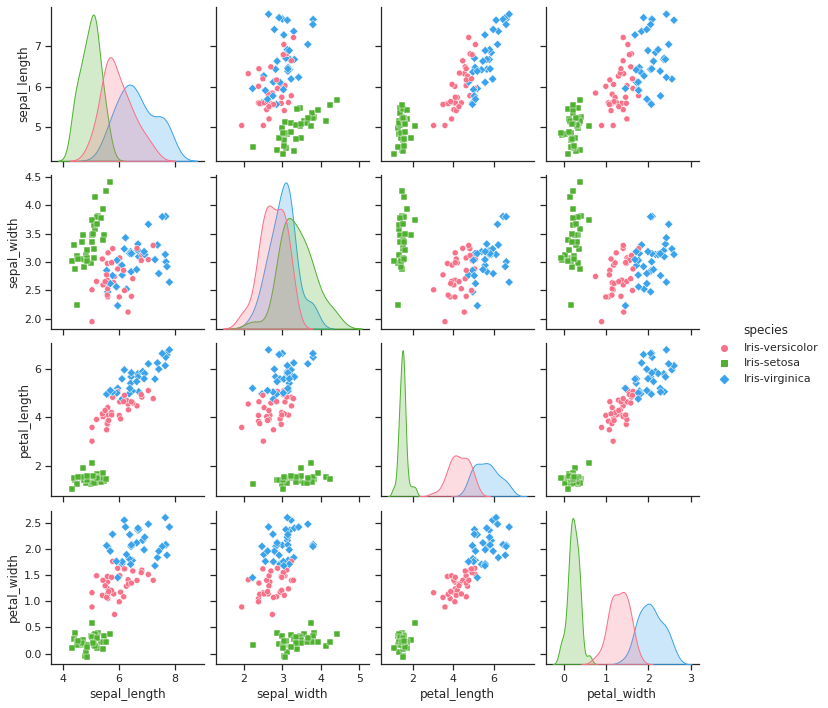

In [7]:
sns.set(style='ticks', color_codes=True)
sns.pairplot(df_iris, hue='species', palette='husl', markers=['o', 's', 'D'])

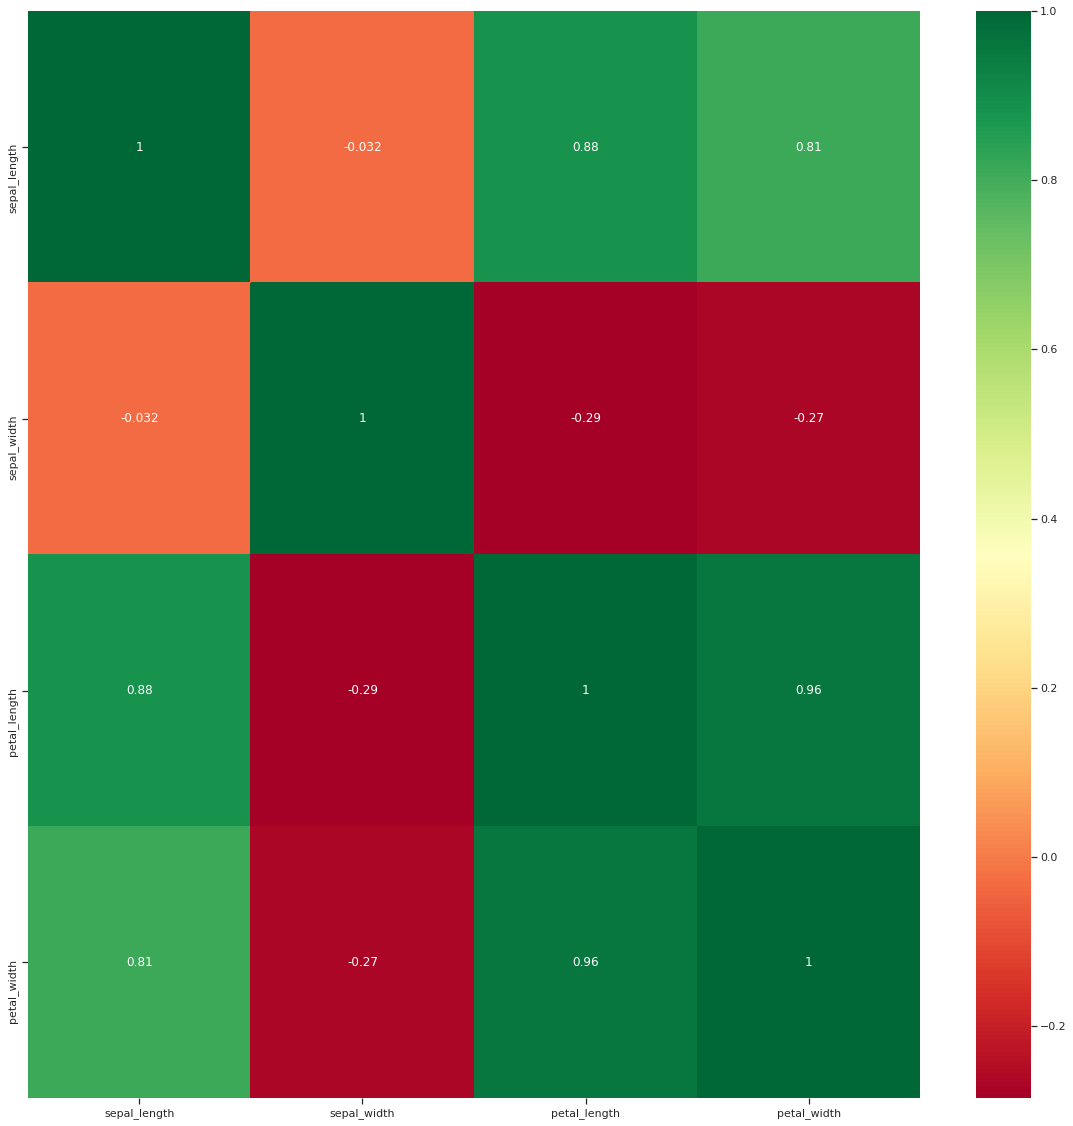

In [8]:
# Get correlations of each features in dataset
corrmat = df_iris.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
iris_heat_map=sns.heatmap(df_iris[top_corr_features].corr(),annot=True,cmap='RdYlGn')


### Calculation of  mean, variance, skew, kurtosis for the datasets

In [9]:
# calculate skew
df_iris.skew()

sepal_length    0.401506
sepal_width     0.367708
petal_length   -0.255767
petal_width    -0.074751
dtype: float64

In [10]:
# calculate kurtosis
df_iris.kurtosis()

sepal_length   -0.544820
sepal_width     0.510490
petal_length   -1.389810
petal_width    -1.315451
dtype: float64

In [11]:
# calculate mean
df_iris.mean()

sepal_length    5.858909
sepal_width     3.059083
petal_length    3.812370
petal_width     1.199708
dtype: float64

In [12]:
# calculate variance
df_iris.var()

sepal_length    0.742420
sepal_width     0.207131
petal_length    3.216602
petal_width     0.619672
dtype: float64

### Checking for null / NaN values

In [13]:
# checking for any null / NaN values
df_iris.isnull().values.any()

True

In [14]:
# checking for any null / NaN values
df_iris.isna().sum()

sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64

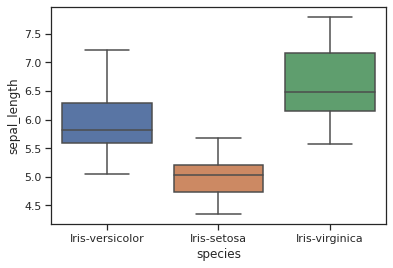

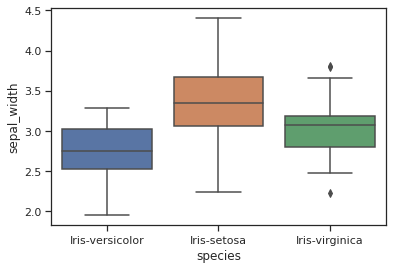

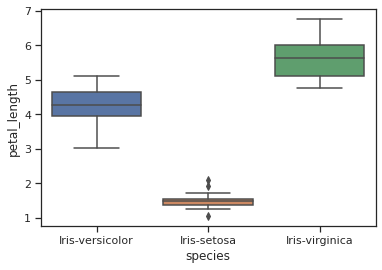

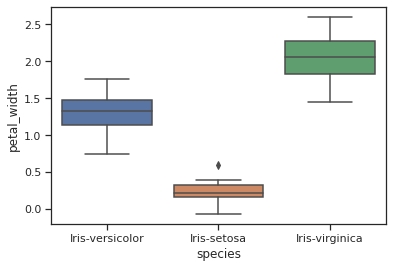

In [15]:
for column in df_iris.columns[:-1]:
    plt.figure()
    ax = sns.boxplot(x='species', y=column, data=df_iris)
    plt.show()

In [16]:
# checking for negative values
df_iris['petal_width'].sort_values()

67   -0.072203
6    -0.042428
34    0.020731
43    0.091698
80    0.104012
        ...   
65    2.423053
71    2.424502
62    2.478509
44    2.554837
47    2.603123
Name: petal_width, Length: 105, dtype: float64

In [17]:
# replacing negative values with NaN (Will be later replaced with feature mean) 
for index in df_iris[df_iris['petal_width'] < 0].index:
    df_iris.loc[index, 'petal_width'] = np.nan 

### Checking for outliers using IQR

In [18]:
# finding outliers using Inter Quartile Range (IQR)
for column in df_iris.columns[0:-1]:
    for specie in df_iris['species'].unique():    
        q25 = df_iris[column][df_iris['species'] == specie].quantile(0.25)
        q75 = df_iris[column][df_iris['species'] == specie].quantile(0.75)
        iqr = q75 - q25
        print(specie.upper(), '-', column.upper())
        print('Percentiles: 25th = %.3f, 75th = %.3f, IQR = %.3f' % (q25, q75, iqr))
        
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off

        # Identify outliers
        df_iris2 = pd.DataFrame(df_iris[df_iris['species'] == specie][column])

        count = len(df_iris2[df_iris2[column] < lower].index)
        count += len(df_iris2[df_iris2[column] > upper].index)
        print('Identified outliers: ', count)

        # replacing outliers with NaN (Will be later replaced with feature mean)
        for index in df_iris2[df_iris2[column] < lower].index:
            df_iris.loc[index, column] = np.nan
        for index in df_iris2[df_iris2[column] > upper].index:
            df_iris.loc[index, column] = np.nan

IRIS-VERSICOLOR - SEPAL_LENGTH
Percentiles: 25th = 5.594, 75th = 6.296, IQR = 0.701
Identified outliers:  0
IRIS-SETOSA - SEPAL_LENGTH
Percentiles: 25th = 4.742, 75th = 5.213, IQR = 0.471
Identified outliers:  0
IRIS-VIRGINICA - SEPAL_LENGTH
Percentiles: 25th = 6.156, 75th = 7.166, IQR = 1.010
Identified outliers:  0
IRIS-VERSICOLOR - SEPAL_WIDTH
Percentiles: 25th = 2.527, 75th = 3.025, IQR = 0.498
Identified outliers:  0
IRIS-SETOSA - SEPAL_WIDTH
Percentiles: 25th = 3.059, 75th = 3.668, IQR = 0.608
Identified outliers:  0
IRIS-VIRGINICA - SEPAL_WIDTH
Percentiles: 25th = 2.803, 75th = 3.182, IQR = 0.379
Identified outliers:  3
IRIS-VERSICOLOR - PETAL_LENGTH
Percentiles: 25th = 3.934, 75th = 4.640, IQR = 0.706
Identified outliers:  0
IRIS-SETOSA - PETAL_LENGTH
Percentiles: 25th = 1.364, 75th = 1.542, IQR = 0.179
Identified outliers:  3
IRIS-VIRGINICA - PETAL_LENGTH
Percentiles: 25th = 5.094, 75th = 6.010, IQR = 0.917
Identified outliers:  0
IRIS-VERSICOLOR - PETAL_WIDTH
Percentiles: 25t

In [19]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,98.000000,94.000000,102.000000
mean,5.858909,3.052443,3.880252,1.230288
std,0.861638,0.441646,1.778404,0.776025
min,4.344007,1.946010,1.253850,0.020731
25%,5.159145,2.769449,1.549032,0.340189
50%,5.736104,3.045434,4.349280,1.359332
75%,6.435413,3.238732,5.097752,1.832747
max,7.795561,4.409565,6.768611,2.603123


In [20]:
# replacing all NaN values with feature mean
for column in df_iris.columns[1:-1]:
    df_iris[column].fillna(value=df_iris[column].mean(), inplace=True)

In [21]:
# check if there are any null / NaN values
df_iris.isnull().values.any()

False

In [22]:
# check if there are any null / NaN values
df_iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.858909,3.052443,3.880252,1.230288
std,0.861638,0.426524,1.681726,0.764751
min,4.344007,1.946010,1.253850,0.020731
25%,5.159145,2.794790,1.592887,0.343669
50%,5.736104,3.052443,4.089166,1.331797
75%,6.435413,3.234061,5.062244,1.817211
max,7.795561,4.409565,6.768611,2.603123


# Question 2: KNN Classification

In [24]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [25]:
# replacing "species" values with [0,1,2]
df_iris["species"]=df_iris["species"].replace("Iris-setosa",0).replace("Iris-versicolor",1).replace("Iris-virginica",2)

In [26]:
x_vars = ['sepal_length','sepal_width','petal_length','petal_width']

X_train = df_iris[x_vars]
y_train = df_iris.species
X_test = df_iris_test[x_vars]

### Improved Model

In [27]:
# importing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# MinMax Scaler Normalization
scaler_min_max = MinMaxScaler()
# Fit object to data
scaler_min_max.fit(X_train)
# Get transformed train data
X_train_normalized = scaler_min_max.transform(X_train)
# Get transformed test data
X_test_normalized = scaler_min_max.transform(X_test)

knn = KNeighborsClassifier(metric='euclidean', weights='uniform')
knn.fit(X_train_normalized, y_train.values.ravel()) 
y_pred = knn.predict(X_test_normalized)

In [28]:
# using best k value, fitting the model on training set predicting the target on test set
knn =  KNeighborsClassifier(n_neighbors = 5, metric='euclidean', weights='uniform')
knn.fit(X_train_normalized, y_train.values.ravel())
y_pred = knn.predict(X_test_normalized)

In [29]:
my_submission = pd.DataFrame({'id': df_iris_test.id, 'species': y_pred})
my_submission.to_csv('submission.csv', index=False)